In [128]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

articles = pd.read_csv('articles/data/combined_sentiments.csv')
nike = pd.read_csv('sales/notebooks/quarterly_nike.csv')
adidas = pd.read_csv('sales/notebooks/quarterly_adidas.csv')

In [129]:
nike_sentiment = articles[articles['brand'] == 'Nike']
adidas_sentiment = articles[articles['brand'] == 'Adidas']

In [130]:
year_month = {
    'Q1-17': '2016/06/01',
    'Q2-17': '2016/09/01',
    'Q3-17': '2016/12/01',
    'Q4-17': '2017/03/01',
    'Q1-18': '2017/06/01',
    'Q2-18': '2017/09/01',
    'Q3-18': '2017/12/01',
    'Q4-18': '2018/03/01',
    'Q1-19': '2018/06/01',
    'Q2-19': '2018/09/01',
    'Q3-19': '2018/12/01',
    'Q4-19': '2019/03/01',
    'Q1-20': '2019/06/01',
    'Q2-20': '2019/09/01',
    'Q3-20': '2019/12/01',
    'Q4-20': '2020/03/01',
    'Q1-21': '2020/06/01'
}

nike['YearMonth'] = nike['statistic'].map(year_month)

In [131]:
year_month_adidas = {
    'Q1-17': '2017/01/01',
    'Q2-17': '2017/04/01',
    'Q3-17': '2017/07/01',
    'Q4-17': '2017/10/01',
    'Q1-18': '2018/01/01',
    'Q2-18': '2018/04/01',
    'Q3-18': '2018/07/01',
    'Q4-18': '2018/10/01',
    'Q1-19': '2019/01/01',
    'Q2-19': '2019/04/01',
    'Q3-19': '2019/07/01',
    'Q4-19': '2019/10/01',
    'Q1-20': '2020/01/01',
    'Q2-20': '2020/04/01',
    'Q3-20': '2020/07/01',
    'Q4-20': '2020/10/01',
    'Q1-21': '2021/01/01'
}

adidas['YearMonth'] = adidas['statistic'].map(year_month_adidas)

In [132]:
nike['YearMonth'] = pd.to_datetime(nike['YearMonth'])
adidas['YearMonth'] = pd.to_datetime(adidas['YearMonth'])

nike_sentiment['publish_date'] = pd.to_datetime(nike_sentiment['publish_date'])
numeric_columns = nike_sentiment.select_dtypes(include='number').columns
nike_monthly_sentiments = nike_sentiment.set_index('publish_date')[numeric_columns].resample('M').mean().reset_index()
nike_monthly_sentiments = pd.merge(nike_monthly_sentiments, nike_sentiment[['publish_date', 'brand']].drop_duplicates(), on='publish_date', how='left')

nike_monthly_sentiments


,publish_date,Unnamed: 0,polarity,subjectivity,content,brand
0,2021-06-30 00:00:00+00:00,0.0,0.124184,0.478738,1.0,Nike
1,2021-07-31 00:00:00+00:00,1.0,NaN,NaN,0.0,Nike
2,2021-08-31 00:00:00+00:00,2.0,0.172248,0.435453,1.0,Nike
3,2021-09-30 00:00:00+00:00,3.0,NaN,NaN,0.0,Nike
4,2021-10-31 00:00:00+00:00,4.0,0.152476,0.422297,1.0,Nike
5,2021-11-30 00:00:00+00:00,5.0,-0.068350,0.229882,1.0,Nike
6,2021-12-31 00:00:00+00:00,6.0,0.168875,0.450718,4.0,Nike
7,2022-01-31 00:00:00+00:00,7.0,NaN,NaN,0.0,Nike
8,2022-02-28 00:00:00+00:00,8.0,NaN,NaN,0.0,Nike
9,2022-03-31 00:00:00+00:00,9.0,0.143497,0.440739,1.0,Nike


In [133]:
# remove timezone and merge
nike_monthly_sentiments['publish_date'] = nike_monthly_sentiments['publish_date'].dt.tz_localize(None)
nike_sales_sentiment = pd.merge(nike_2020, nike_monthly_sentiments, left_on='YearMonth', right_on='publish_date', how='inner')
nike_sales_sentiment.drop(columns=['publish_date'], inplace=True)

nike_sales_sentiment.head()


,YearMonth,Units Sold Sum,Operating Profit Sum,Operating Margin Sum,Operating Margin Median,Unnamed: 0,polarity,subjectivity,content,brand


In [134]:
# align to start of month and merge
nike_2020['YearMonth'] = nike_2020['YearMonth'].dt.to_period('M').dt.to_timestamp()
nike_monthly_sentiments['publish_date'] = nike_monthly_sentiments['publish_date'].dt.to_period('M').dt.to_timestamp()

print(nike_2020['YearMonth'].unique())
print(nike_monthly_sentiments['publish_date'].unique())


<DatetimeArray>
['2020-01-01 00:00:00', '2020-02-01 00:00:00', '2020-03-01 00:00:00',
 '2020-04-01 00:00:00', '2020-05-01 00:00:00', '2020-06-01 00:00:00',
 '2020-07-01 00:00:00', '2020-08-01 00:00:00', '2020-09-01 00:00:00',
 '2020-10-01 00:00:00', '2020-11-01 00:00:00', '2020-12-01 00:00:00',
 '2021-01-01 00:00:00', '2021-02-01 00:00:00', '2021-03-01 00:00:00',
 '2021-04-01 00:00:00', '2021-05-01 00:00:00', '2021-06-01 00:00:00',
 '2021-07-01 00:00:00', '2021-08-01 00:00:00', '2021-09-01 00:00:00',
 '2021-10-01 00:00:00', '2021-11-01 00:00:00', '2021-12-01 00:00:00']
Length: 24, dtype: datetime64[ns]
<DatetimeArray>
['2021-06-01 00:00:00', '2021-07-01 00:00:00', '2021-08-01 00:00:00',
 '2021-09-01 00:00:00', '2021-10-01 00:00:00', '2021-11-01 00:00:00',
 '2021-12-01 00:00:00', '2022-01-01 00:00:00', '2022-02-01 00:00:00',
 '2022-03-01 00:00:00', '2022-04-01 00:00:00', '2022-05-01 00:00:00',
 '2022-06-01 00:00:00', '2022-07-01 00:00:00', '2022-08-01 00:00:00',
 '2022-09-01 00:00:00', 

In [135]:
# merge again
nike_sales_sentiment = pd.merge(nike_2020, nike_monthly_sentiments, left_on='YearMonth', right_on='publish_date', how='inner')
nike_sales_sentiment.drop(columns=['publish_date'], inplace=True)
nike_sales_sentiment

,YearMonth,Units Sold Sum,Operating Profit Sum,Operating Margin Sum,Operating Margin Median,Unnamed: 0,polarity,subjectivity,content,brand
0,2021-06-01,137262873,19364465670,246409.35,0.42,0.0,0.124184,0.478738,1.0,Nike
1,2021-07-01,84874880,13135882920,143561.60,0.41,1.0,NaN,NaN,0.0,Nike
2,2021-08-01,123942530,17308913595,201739.35,0.42,2.0,0.172248,0.435453,1.0,Nike
3,2021-09-01,145308960,20175993056,245873.92,0.42,3.0,NaN,NaN,0.0,Nike
4,2021-10-01,220495518,28819315595,410095.62,0.40,4.0,0.152476,0.422297,1.0,Nike
5,2021-11-01,141809913,18732441105,261294.93,0.41,5.0,-0.068350,0.229882,1.0,Nike
6,2021-12-01,141174558,20459992468,247318.09,0.40,6.0,0.168875,0.450718,4.0,Nike


## Correlation Matrix

In [164]:
correlation_matrix = nike_sales_sentiment[['polarity', 'subjectivity', 'Operating Profit Sum', 'Operating Margin Sum']].corr()
correlation_matrix

,polarity,subjectivity,Operating Profit Sum,Operating Margin Sum
polarity,1.000000,0.933633,0.244648,0.049080
subjectivity,0.933633,1.000000,0.151719,-0.027856
Operating Profit Sum,0.244648,0.151719,1.000000,0.983741
Operating Margin Sum,0.049080,-0.027856,0.983741,1.000000


### Polarity and Subjectivity:
There is a very strong positive correlation (0.9336) between polarity and subjectivity. As the sentiment of the text becomes more positive , it also tends to become more subjective. This makes sense because subjective opinions often carry a positive or negative slant.

### Polarity and Sales/Profit Metrics:
Polarity has a low positive correlation with Units Sold Sum (0.1368) and Operating Profit Sum (0.2446). This indicates that a slight increase in positivity might be associated with an increase in sales and profit, but the relationship is not strong.

### Sales and Profit Metrics:
Units Sold Sum has an extremely strong positive correlation with both Operating Profit Sum (0.9934) and Operating Margin Sum (0.9936). This indicates that as the number of units sold increases, both operating profit and operating margin also increase almost proportionally.
Operating Profit Sum and Operating Margin Sum are also very strongly correlated (0.9837), which is expected as profit and margin are closely related financial metrics.

### Key Takeaways:
- Polarity and subjectivity are strongly related, indicating that **more subjective content is likely to be more polarized** (either positive or negative).
- The sentiment metrics (polarity and subjectivity) have weak to negligible correlations with sales and profit metrics, suggesting that while there might be some relationship, **sentiment alone is not a strong predictor of sales performance**.
- Sales and profit metrics are highly interrelated, as expected in financial data.

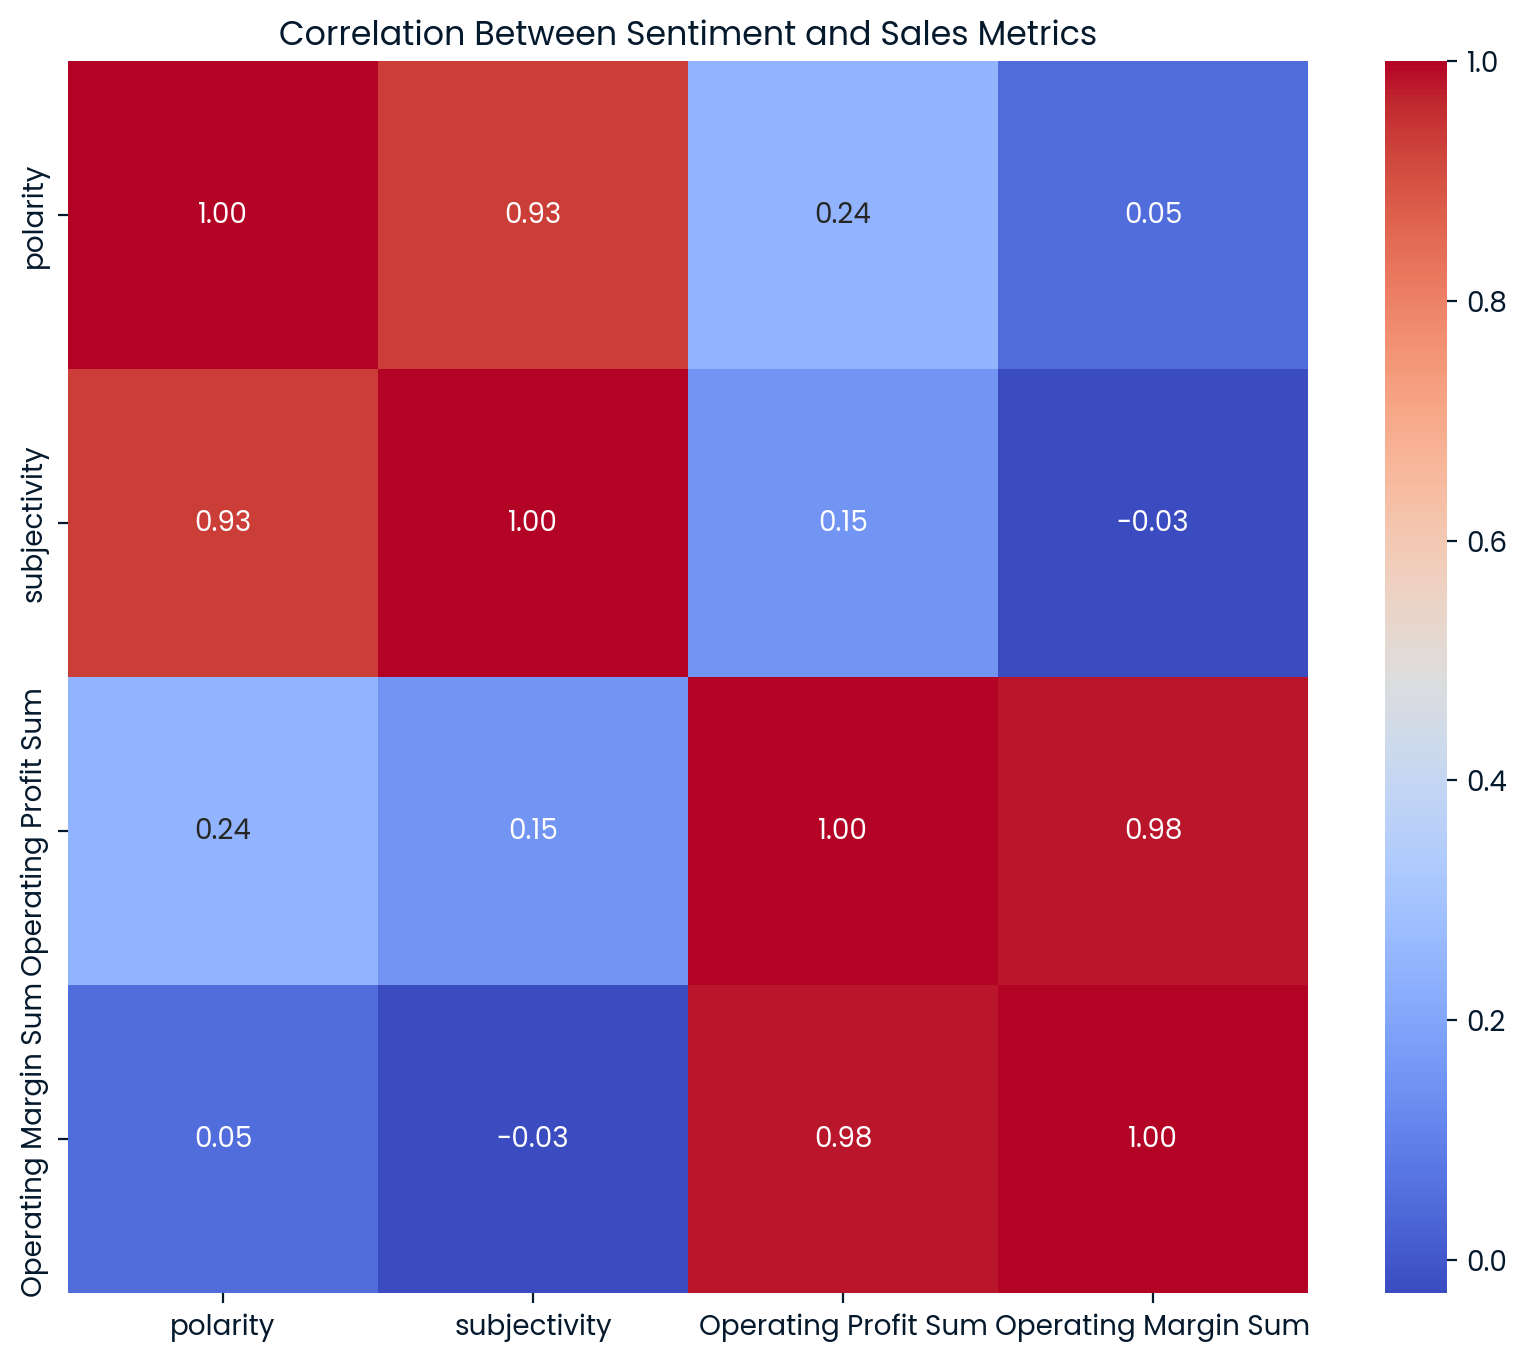

In [165]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Sentiment and Sales Metrics')
plt.show()

## Polarity vs. Units Sold

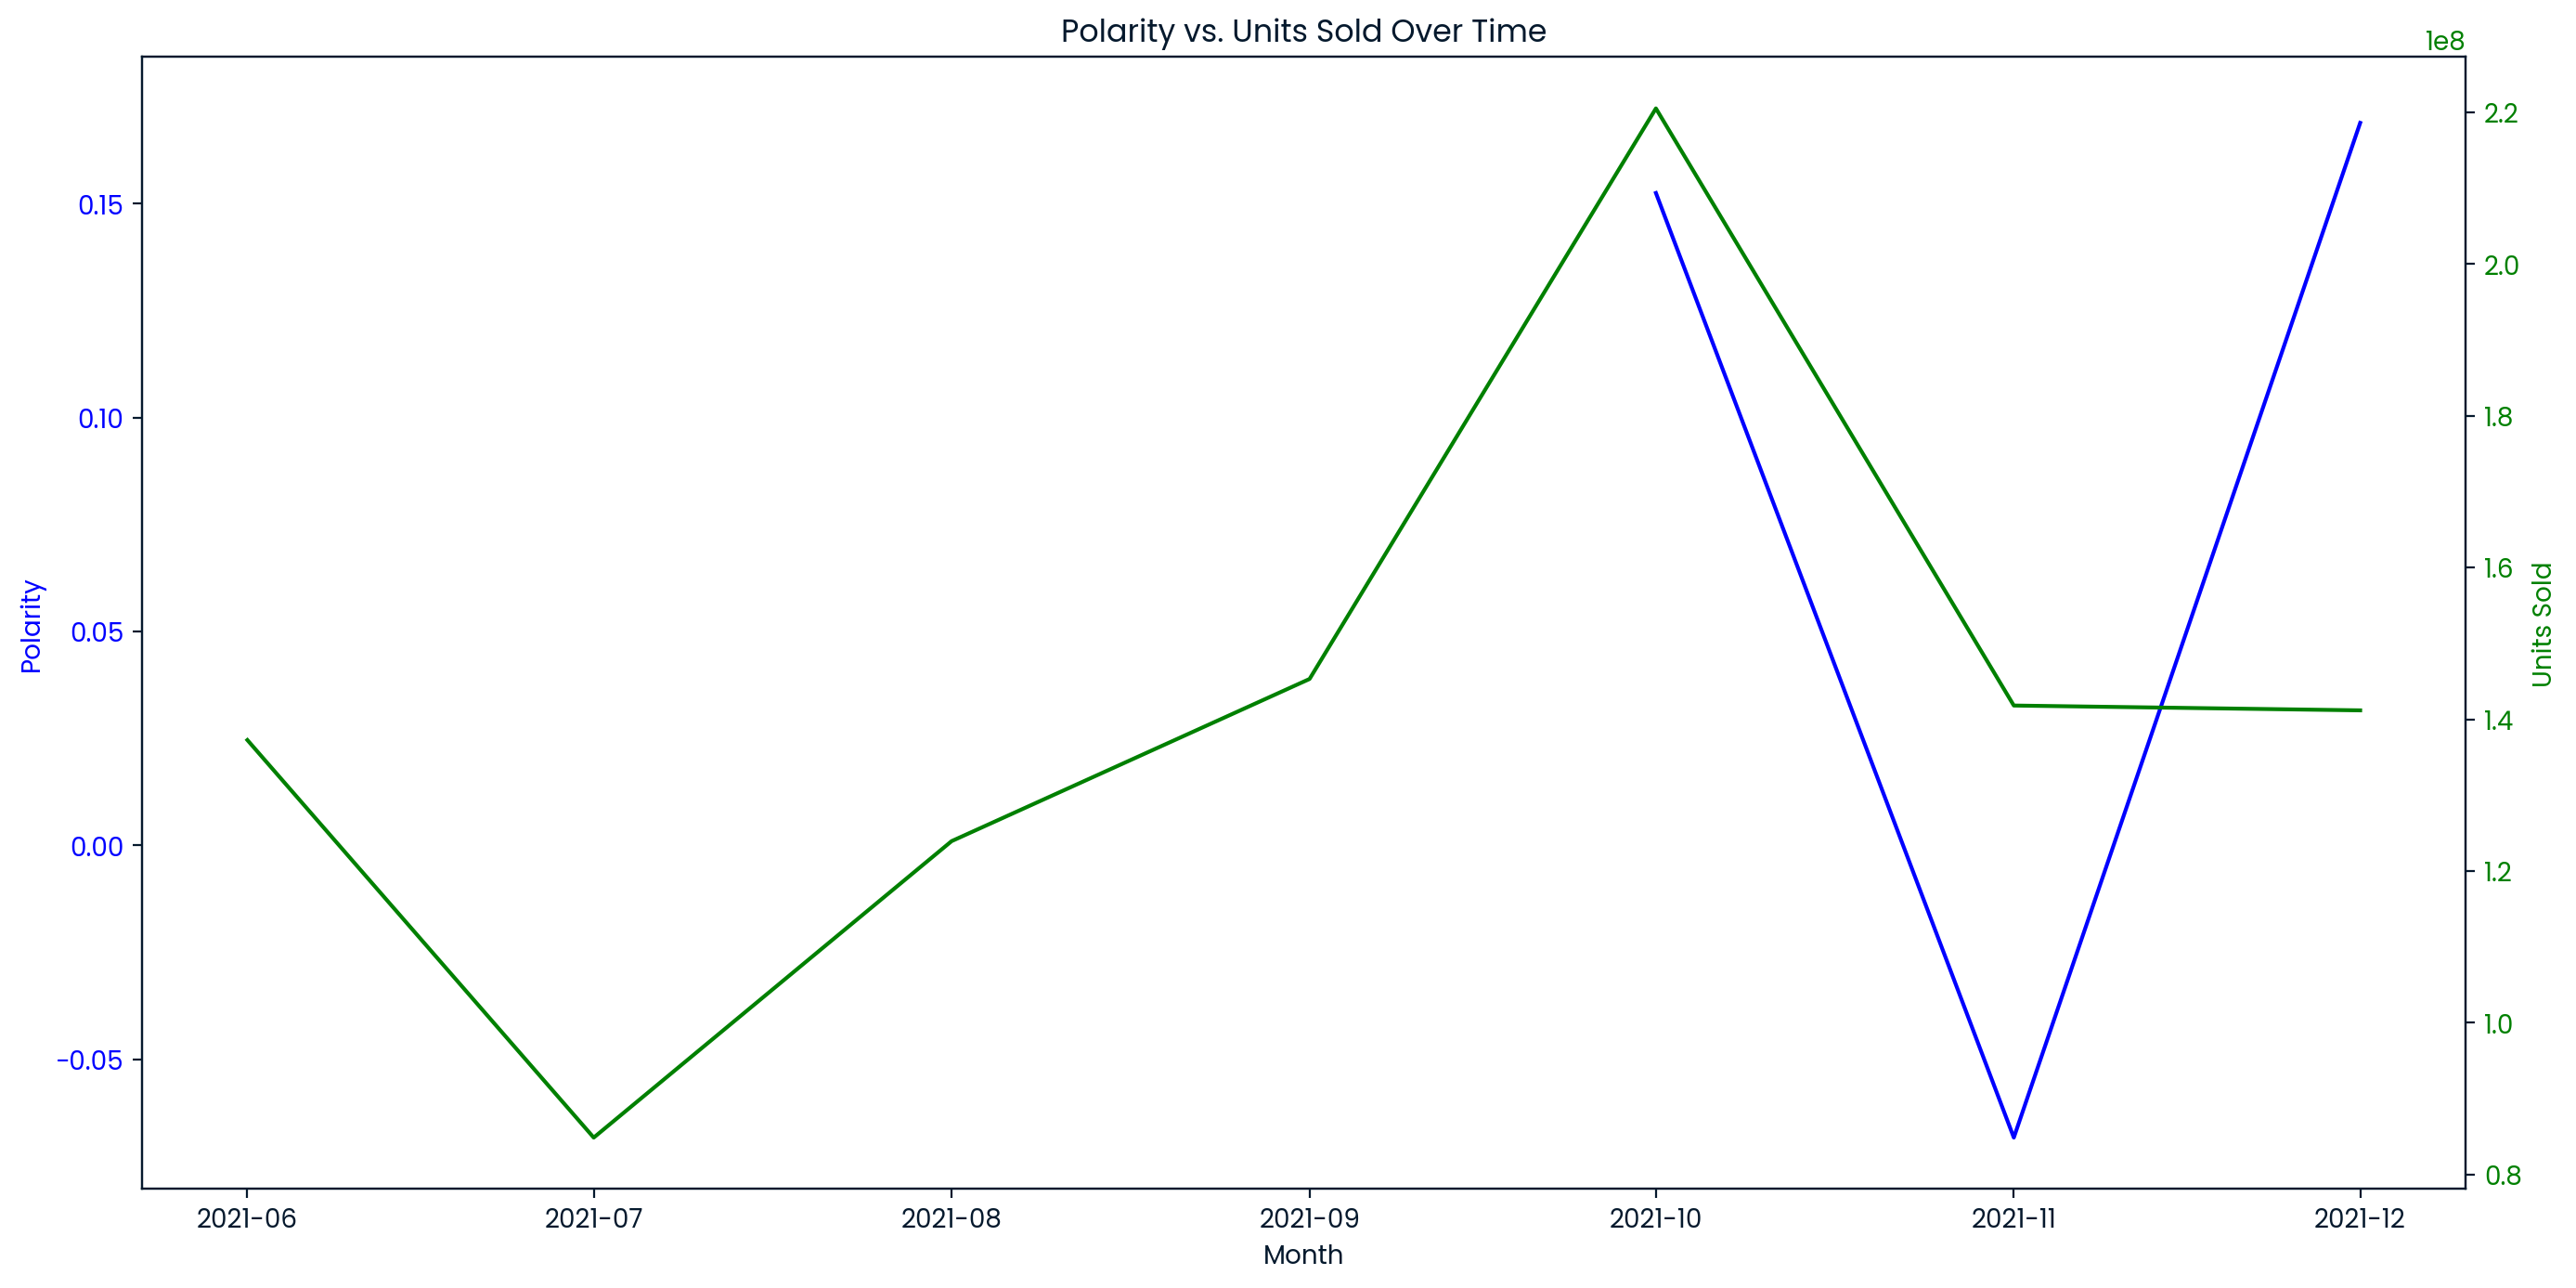

In [138]:
# Plot polarity and units sold over time
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Month')
ax1.set_ylabel('Polarity', color='blue')
ax1.plot(nike_sales_sentiment['YearMonth'], nike_sales_sentiment['polarity'], color='blue', label='Polarity')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Units Sold', color='green')
ax2.plot(nike_sales_sentiment['YearMonth'], nike_sales_sentiment['Units Sold Sum'], color='green', label='Units Sold')
ax2.tick_params(axis='y', labelcolor='green')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Polarity vs. Units Sold Over Time')
plt.show()

In [139]:
# Example: Renaming columns in Adidas sales data to match the expected format
adidas.rename(columns={
    'grossProfit': 'Gross Profit Sum',
    'grossMargin': 'Gross Margin Sum',
    # Add other necessary renames here
}, inplace=True)

In [142]:
# Ensure both Nike and Adidas have consistent columns
nike_sentiment['brand'] = 'Nike'
adidas_sentiment['brand'] = 'Adidas'

# Combine the sentiment data for Nike and Adidas
combined_sentiments = pd.concat([nike_sentiment, adidas_sentiment])

# Display the first few rows of the combined data to ensure it merged correctly
combined_sentiments.head()


,Unnamed: 0,publish_date,polarity,subjectivity,content,brand
0,0,2021-06-30 00:00:00+00:00,0.124184,0.478738,1,Nike
1,1,2021-07-31 00:00:00+00:00,NaN,NaN,0,Nike
2,2,2021-08-31 00:00:00+00:00,0.172248,0.435453,1,Nike
3,3,2021-09-30 00:00:00+00:00,NaN,NaN,0,Nike
4,4,2021-10-31 00:00:00+00:00,0.152476,0.422297,1,Nike


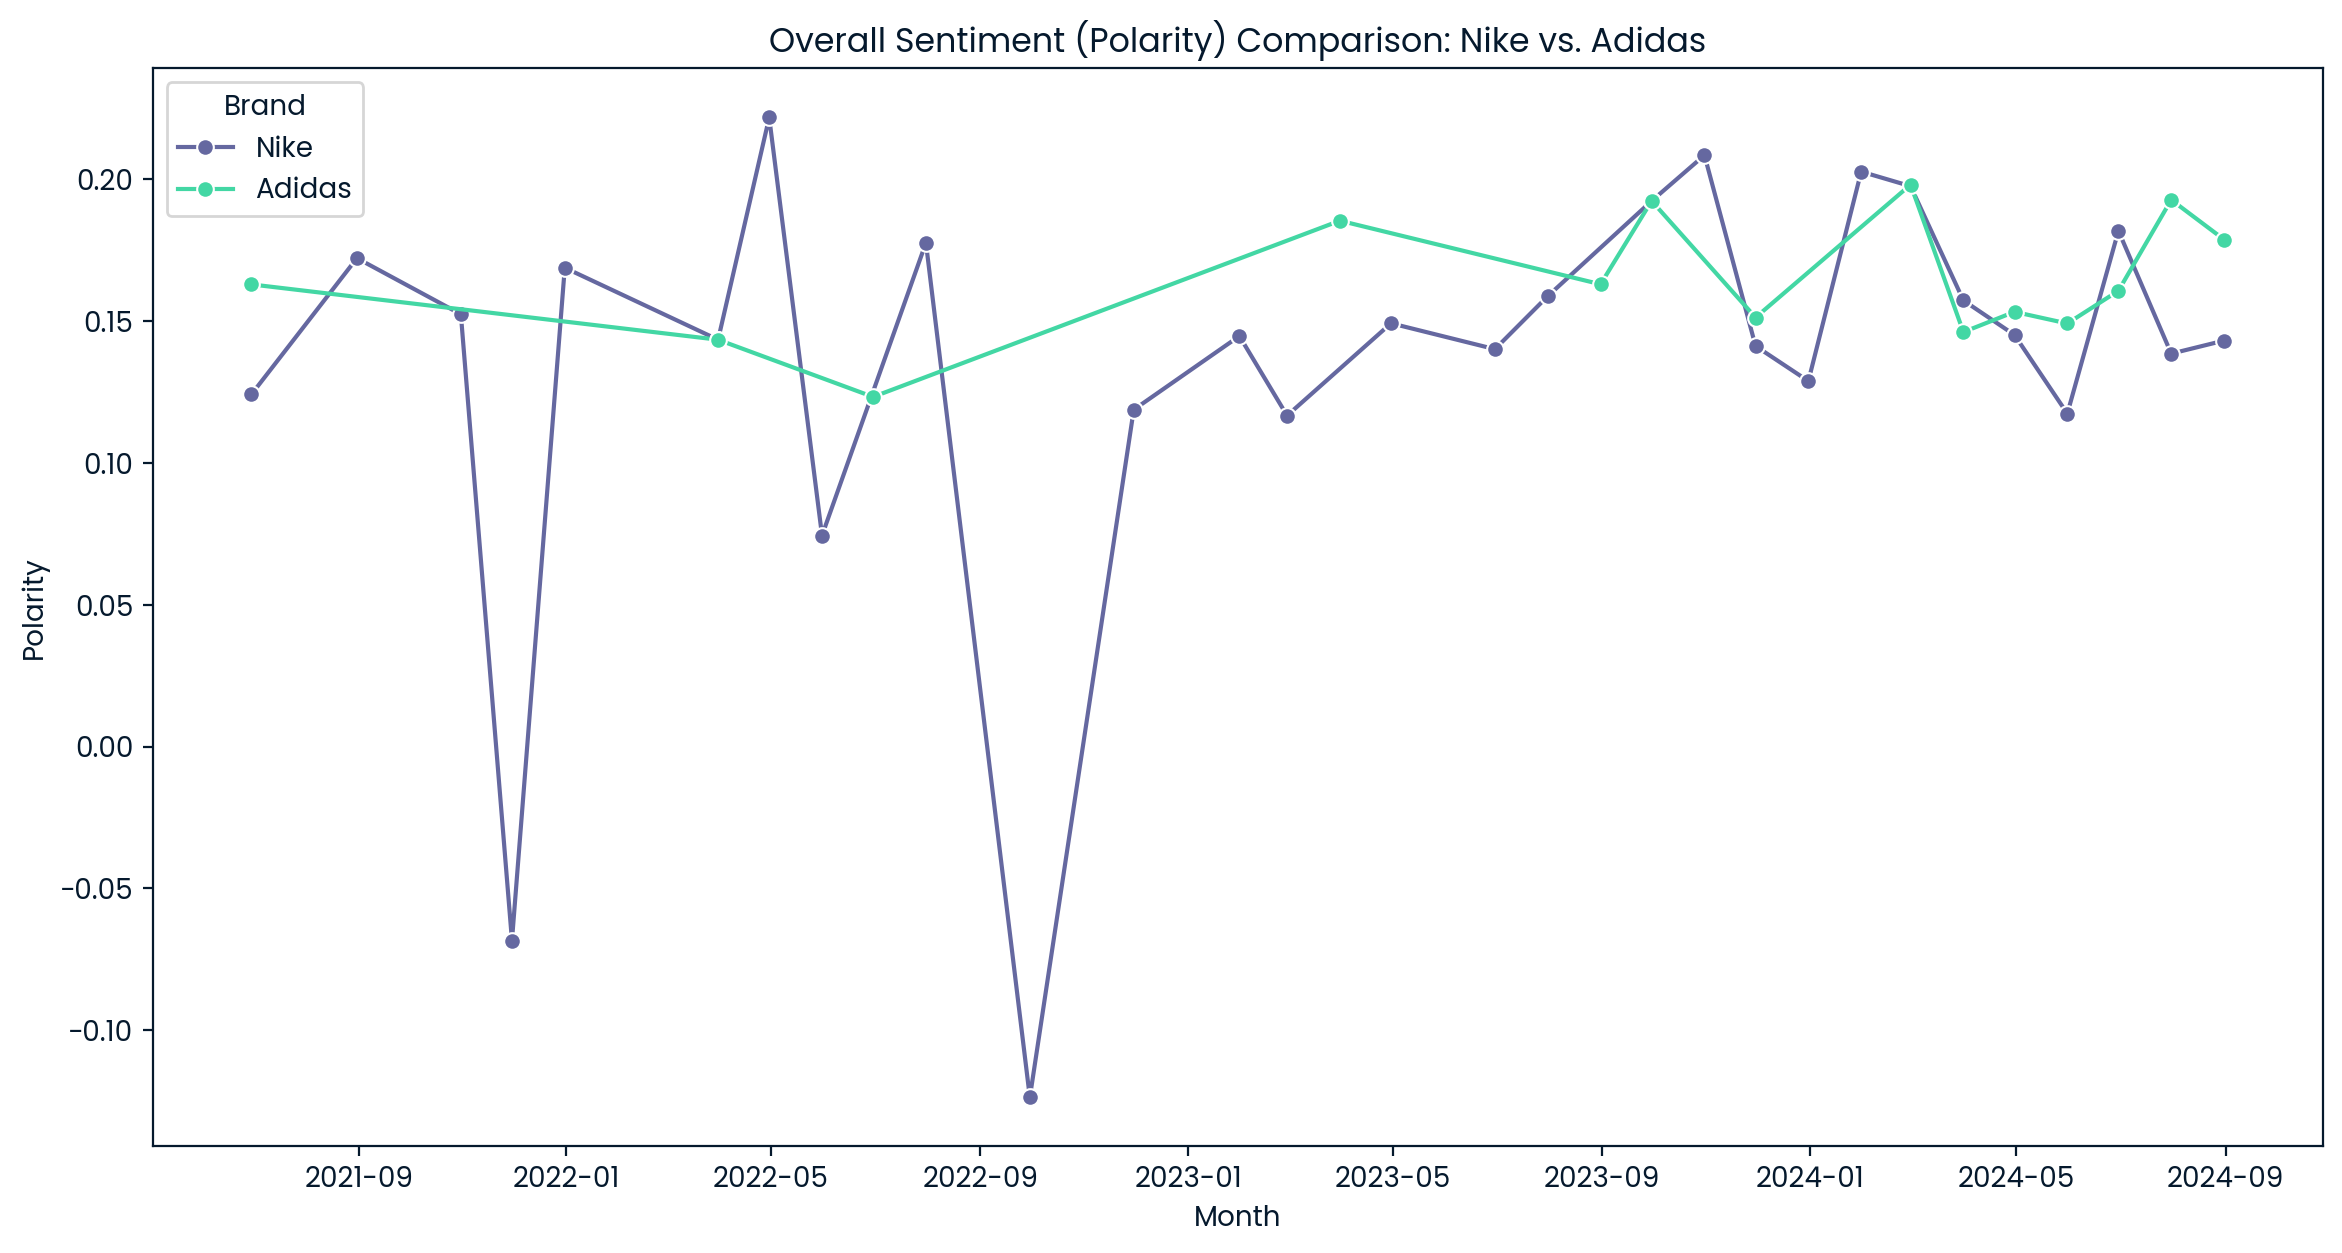

In [144]:
# 1. Convert 'publish_date' to datetime
combined_sentiments['publish_date'] = pd.to_datetime(combined_sentiments['publish_date'])

# Optional: Sort the DataFrame by 'publish_date' to ensure chronological plotting
combined_sentiments.sort_values('publish_date', inplace=True)

# 2. Plot overall sentiment (polarity) comparison
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_sentiments, x='publish_date', y='polarity', hue='brand', marker='o')
plt.title('Overall Sentiment (Polarity) Comparison: Nike vs. Adidas')
plt.xlabel('Month')
plt.ylabel('Polarity')
plt.legend(title='Brand')
plt.show()

In [153]:
# Ensure YearMonth in sales data is in datetime format
nike['YearMonth'] = pd.to_datetime(nike['YearMonth'])
adidas['YearMonth'] = pd.to_datetime(adidas['YearMonth'])

# Convert publish_date in combined_sentiments to remove timezone info
combined_sentiments['publish_date'] = pd.to_datetime(combined_sentiments['publish_date']).dt.tz_localize(None)

# Merge Nike sales with Nike sentiment
nike_combined = pd.merge(nike, combined_sentiments[combined_sentiments['brand'] == 'Nike'], left_on='YearMonth', right_on='publish_date', how='inner')

# Merge Adidas sales with Adidas sentiment
adidas_combined = pd.merge(adidas, combined_sentiments[combined_sentiments['brand'] == 'Adidas'], left_on='YearMonth', right_on='publish_date', how='inner')

# Combine the two datasets
full_combined = pd.concat([nike_combined, adidas_combined])

full_combined.columns


Index(['index', 'year', 'revenues', 'grossProfit', 'grossMargin', 'statistic',
       'YearMonth', 'Unnamed: 0', 'publish_date', 'polarity', 'subjectivity',
       'content', 'brand', 'Gross Profit Sum', 'Gross Margin Sum'],
      dtype='object')

## Sales vs. Sentiment over Time

In [157]:
full_combined[['polarity', 'Gross Profit Sum']].describe()


,polarity,Gross Profit Sum
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [159]:
full_combined.isnull().sum()

index               0
year                0
revenues            0
grossProfit         0
grossMargin         0
statistic           0
YearMonth           0
Unnamed: 0          0
publish_date        0
polarity            0
subjectivity        0
content             0
brand               0
Gross Profit Sum    0
Gross Margin Sum    0
dtype: int64

In [161]:
full_combined.dtypes

index                      float64
year                         int64
revenues                   float64
grossProfit                float64
grossMargin                float64
statistic                   object
YearMonth           datetime64[ns]
Unnamed: 0                   int64
publish_date        datetime64[ns]
polarity                   float64
subjectivity               float64
content                      int64
brand                       object
Gross Profit Sum           float64
Gross Margin Sum           float64
dtype: object

In [163]:
full_combined['polarity'].unique()
full_combined['Gross Profit Sum'].unique()

array([], dtype=float64)

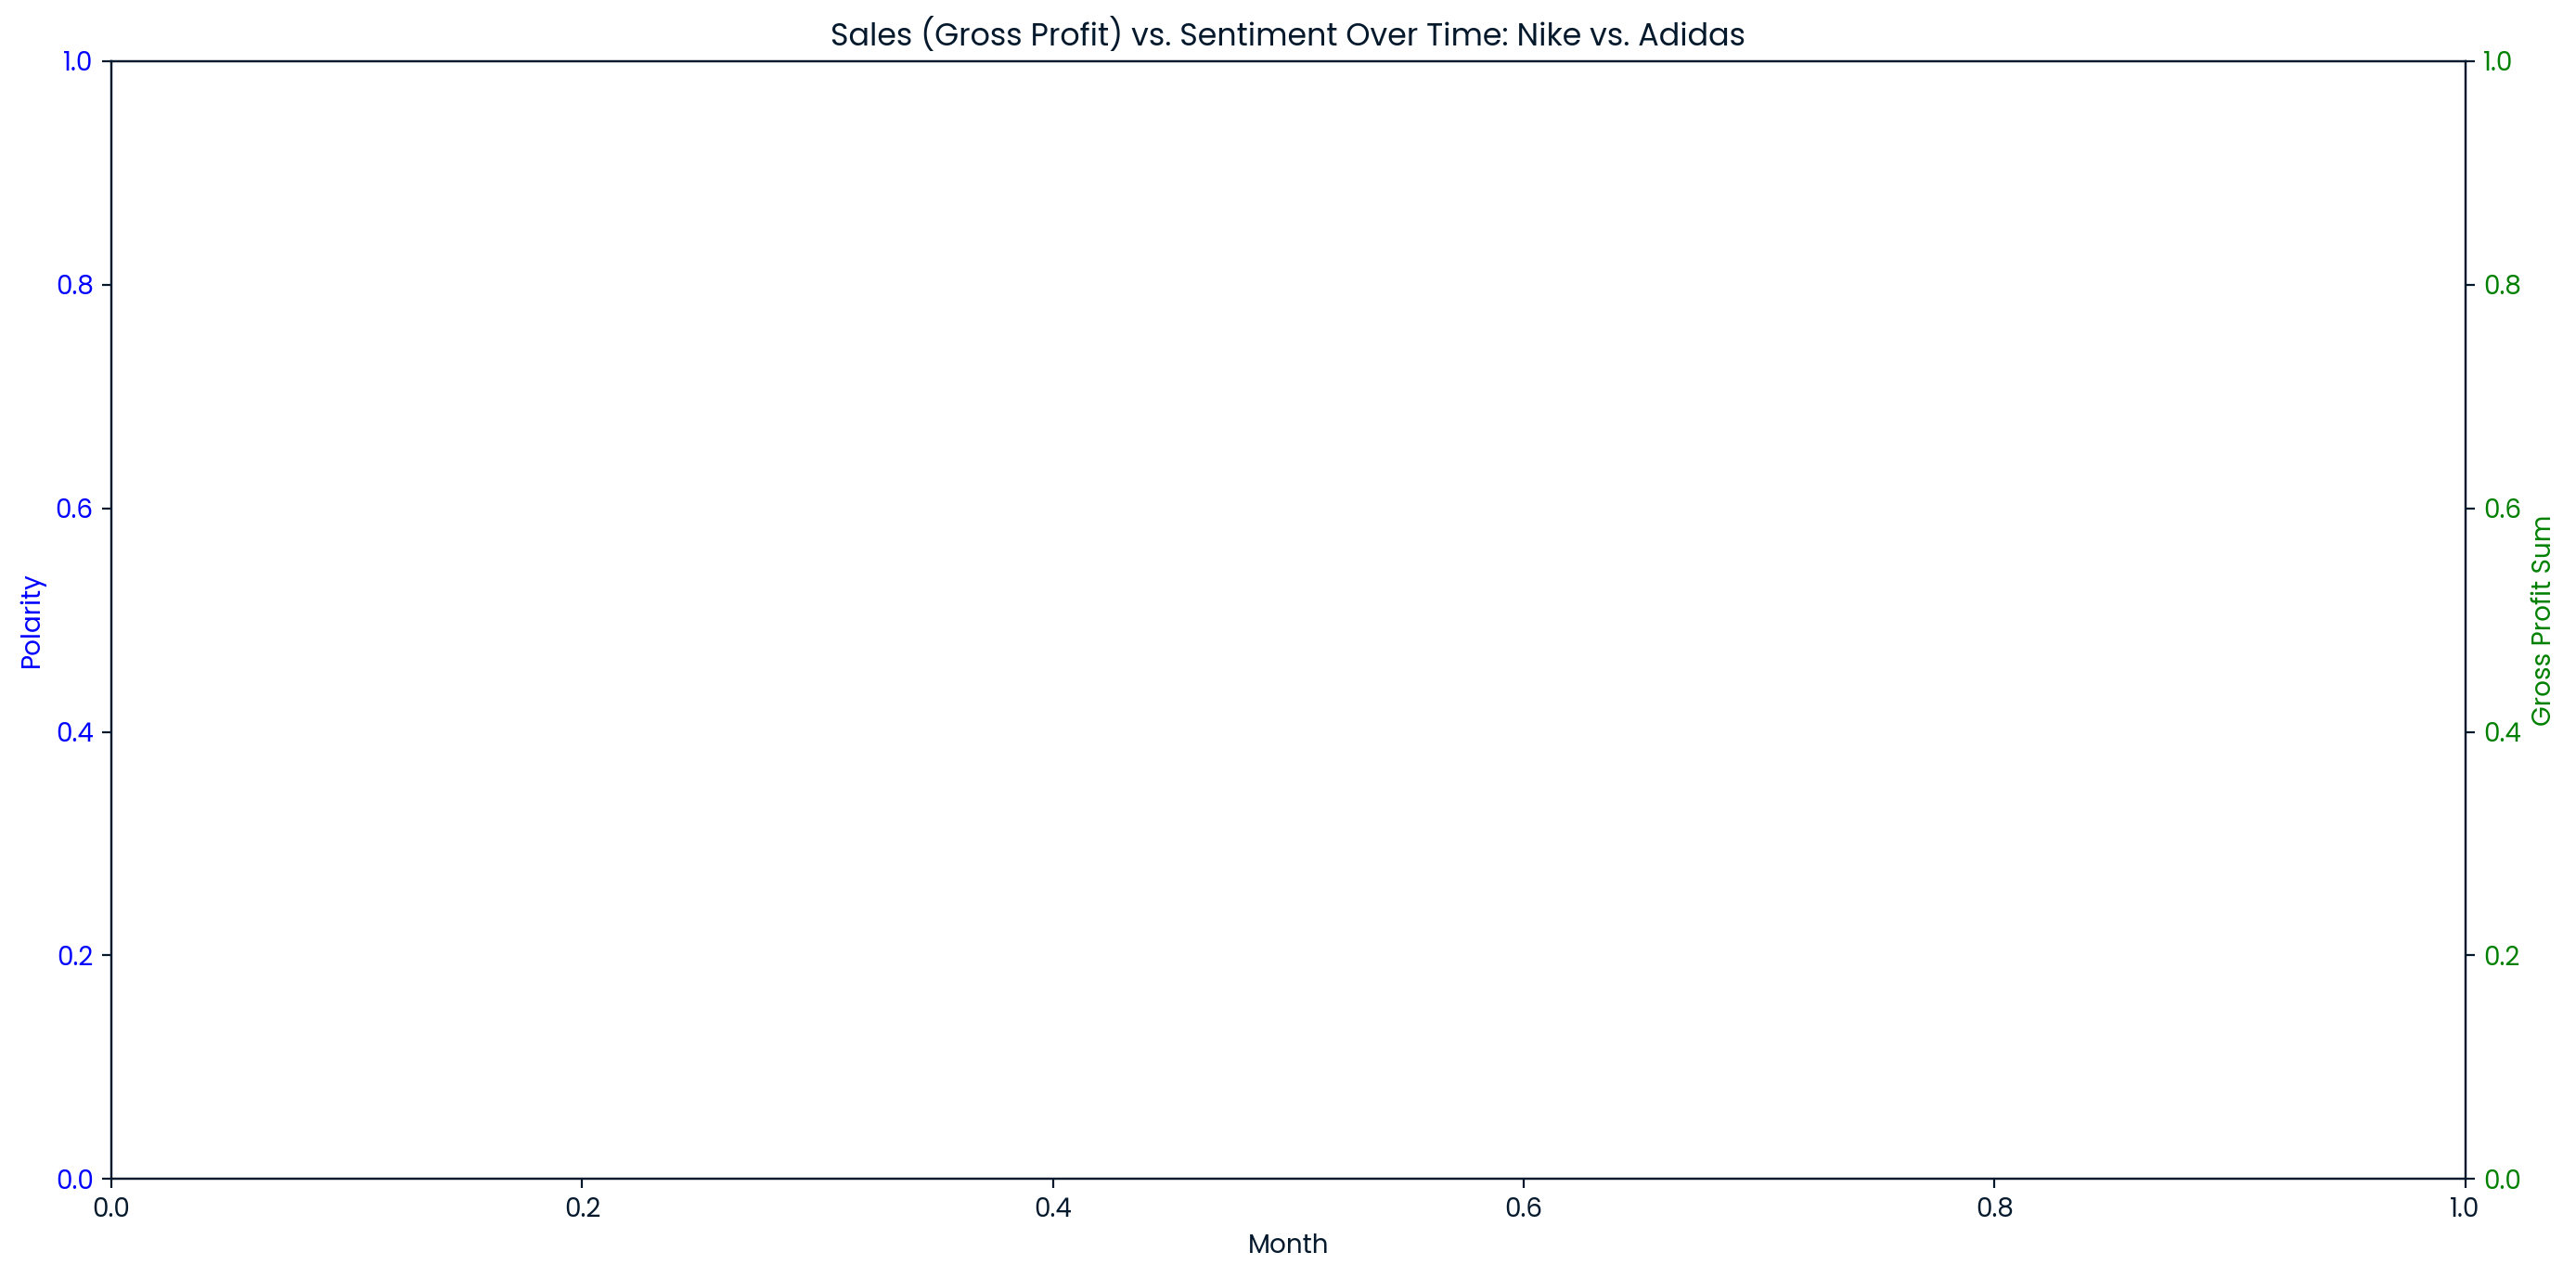

In [155]:
# Plot sales (Gross Profit Sum) vs. sentiment for Nike and Adidas
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Polarity on primary y-axis
sns.lineplot(data=full_combined, x='YearMonth', y='polarity', hue='brand', ax=ax1, marker='o')
ax1.set_xlabel('Month')
ax1.set_ylabel('Polarity', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot Gross Profit Sum on secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(data=full_combined, x='YearMonth', y='Gross Profit Sum', hue='brand', ax=ax2, marker='o', palette='dark')
ax2.set_ylabel('Gross Profit Sum', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Sales (Gross Profit) vs. Sentiment Over Time: Nike vs. Adidas')
fig.tight_layout()
plt.show()
